# 統計基礎① - シンプル版

今日は、データを理解するための基本的な統計について学びます。
平均・分散・標準偏差という3つの重要な概念を、身近な例で理解しましょう！

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

## 1. 平均（Average / Mean）

平均は「データの中心」を表す最も基本的な指標です。

In [6]:
# クラスのテスト点数（10人分）
scores = np.array([75, 82, 90, 68, 77, 85, 92, 70, 88, 79])

print("テストの点数:", scores)
print("人数:", len(scores), "人")
print("人数:", scores.size, "人")        # 10（NumPy専用）

テストの点数: [75 82 90 68 77 85 92 70 88 79]
人数: 10 人
人数: 10 人


In [7]:
# 平均を計算
mean_score = np.mean(scores)        # mean_score = scores.mean() も有効
print(f"平均点: {mean_score:.1f}点")

# 手動で計算して確認
manual_mean = sum(scores) / len(scores)
print(f"手動計算の平均: {manual_mean:.1f}点")

平均点: 80.6点
手動計算の平均: 80.6点


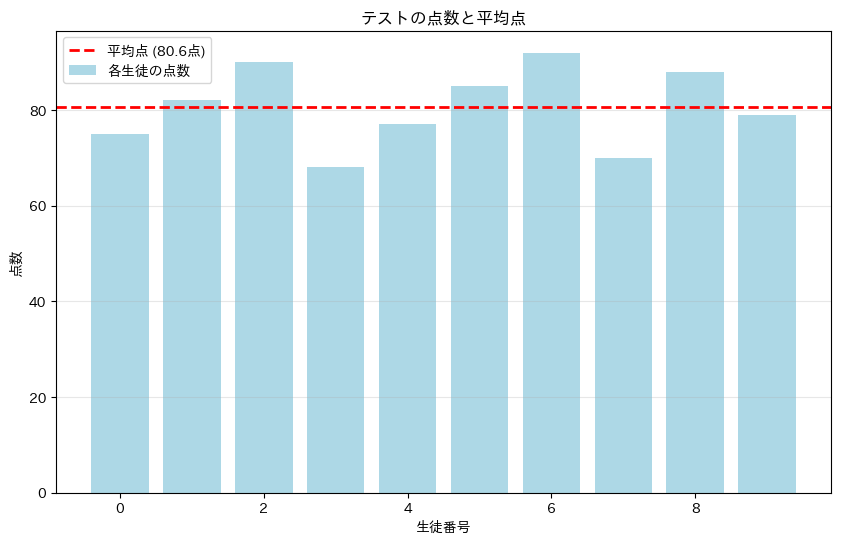

In [8]:
# 平均を視覚化
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores, color='lightblue', label='各生徒の点数')
plt.axhline(y=mean_score, color='red', linestyle='--', linewidth=2, label=f'平均点 ({mean_score:.1f}点)')
plt.xlabel('生徒番号')
plt.ylabel('点数')
plt.title('テストの点数と平均点')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

### 💡 平均のポイント
- すべてのデータを足して、データ数で割る
- データの「中心的な値」を表す
- 極端な値（外れ値）に影響されやすい

## 2. 分散（Variance）

分散は「データのばらつき具合」を表す指標です。

In [9]:
# 分散を理解するために、2つのクラスを比較
class_A = np.array([78, 80, 79, 81, 82, 77, 79, 80, 81, 78])  # ばらつきが小さい
class_B = np.array([95, 65, 88, 70, 92, 68, 85, 73, 90, 74])  # ばらつきが大きい

print("クラスA:", class_A)
print("クラスB:", class_B)
print("\nクラスAの平均:", np.mean(class_A))
print("クラスBの平均:", np.mean(class_B))

クラスA: [78 80 79 81 82 77 79 80 81 78]
クラスB: [95 65 88 70 92 68 85 73 90 74]

クラスAの平均: 79.5
クラスBの平均: 80.0


In [10]:
# 分散を計算
var_A = np.var(class_A)
var_B = np.var(class_B)

print(f"クラスAの分散: {var_A:.2f}")
print(f"クラスBの分散: {var_B:.2f}")
print("\n→ クラスBの方が分散が大きい = ばらつきが大きい")

クラスAの分散: 2.25
クラスBの分散: 111.20

→ クラスBの方が分散が大きい = ばらつきが大きい


In [11]:
# 分散の計算過程を見てみる
mean_A = np.mean(class_A)
print(f"クラスAの平均: {mean_A}")
print("\n各データと平均の差:")

differences = class_A - mean_A
for i, (score, diff) in enumerate(zip(class_A, differences)):
    print(f"生徒{i+1}: {score}点 - {mean_A}点 = {diff:.1f}")

print("\n差の2乗:")
squared_diff = differences ** 2
for i, sq in enumerate(squared_diff):
    print(f"生徒{i+1}: {squared_diff[i]:.2f}")

print(f"\n分散（差の2乗の平均）: {np.mean(squared_diff):.2f}")

クラスAの平均: 79.5

各データと平均の差:
生徒1: 78点 - 79.5点 = -1.5
生徒2: 80点 - 79.5点 = 0.5
生徒3: 79点 - 79.5点 = -0.5
生徒4: 81点 - 79.5点 = 1.5
生徒5: 82点 - 79.5点 = 2.5
生徒6: 77点 - 79.5点 = -2.5
生徒7: 79点 - 79.5点 = -0.5
生徒8: 80点 - 79.5点 = 0.5
生徒9: 81点 - 79.5点 = 1.5
生徒10: 78点 - 79.5点 = -1.5

差の2乗:
生徒1: 2.25
生徒2: 0.25
生徒3: 0.25
生徒4: 2.25
生徒5: 6.25
生徒6: 6.25
生徒7: 0.25
生徒8: 0.25
生徒9: 2.25
生徒10: 2.25

分散（差の2乗の平均）: 2.25


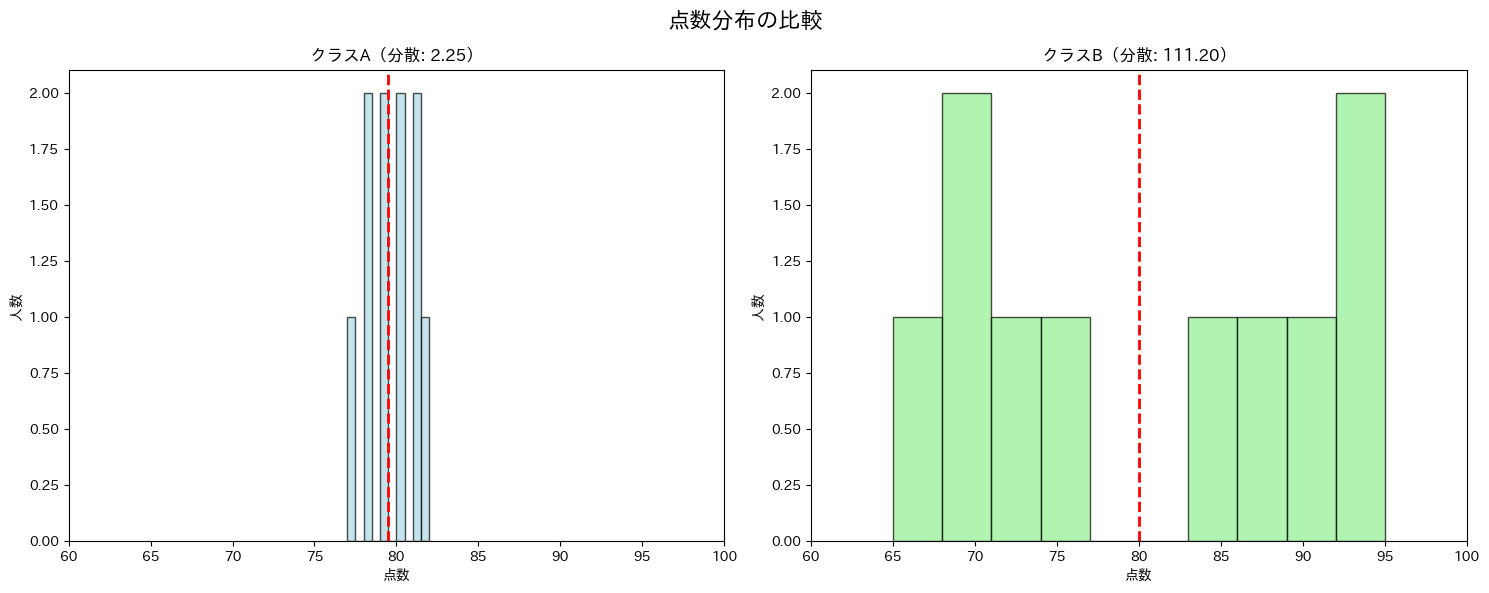

In [12]:
# 2つのクラスを視覚化して比較
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# クラスA
ax1.hist(class_A, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
ax1.axvline(np.mean(class_A), color='red', linestyle='--', linewidth=2)
ax1.set_title(f'クラスA（分散: {var_A:.2f}）')
ax1.set_xlabel('点数')
ax1.set_ylabel('人数')
ax1.set_xlim(60, 100)

# クラスB
ax2.hist(class_B, bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
ax2.axvline(np.mean(class_B), color='red', linestyle='--', linewidth=2)
ax2.set_title(f'クラスB（分散: {var_B:.2f}）')
ax2.set_xlabel('点数')
ax2.set_ylabel('人数')
ax2.set_xlim(60, 100)

plt.suptitle('点数分布の比較', fontsize=16)
plt.tight_layout()
plt.show()

## 3. 標準偏差（Standard Deviation）

標準偏差は分散の平方根で、元のデータと同じ単位で「ばらつき」を表現できます。

In [13]:
# 標準偏差を計算
std_A = np.std(class_A)
std_B = np.std(class_B)

print(f"クラスAの標準偏差: {std_A:.2f}点")
print(f"クラスBの標準偏差: {std_B:.2f}点")

# 分散との関係
print(f"\n確認: √{var_A:.2f} = {np.sqrt(var_A):.2f}")
print(f"確認: √{var_B:.2f} = {np.sqrt(var_B):.2f}")

クラスAの標準偏差: 1.50点
クラスBの標準偏差: 10.55点

確認: √2.25 = 1.50
確認: √111.20 = 10.55


In [26]:
# 標準偏差の意味を理解する
data = np.array([75, 82, 90, 68, 77, 85, 92, 70, 88, 79])
data_ave = np.mean(data)
data_std = np.std(data)

print(f"平均: {data_ave:.1f}点")
print(f"標準偏差: {data_std:.1f}点")

# 平均±標準偏差の範囲
print(f"\n平均 ± 標準偏差の範囲: {data_ave-std_dev:.1f}点 〜 {data_ave+data_std:.1f}点")

# この範囲に含まれるデータ数を確認
within_1std = np.sum((data >= data_ave - data_std) & (data <= data_ave + data_std))
print(f"この範囲に含まれるデータ: {within_1std}個 ({within_1std/len(data)*100:.0f}%)")

平均: 80.6点
標準偏差: 7.8点

平均 ± 標準偏差の範囲: 72.8点 〜 88.4点
この範囲に含まれるデータ: 6個 (60%)


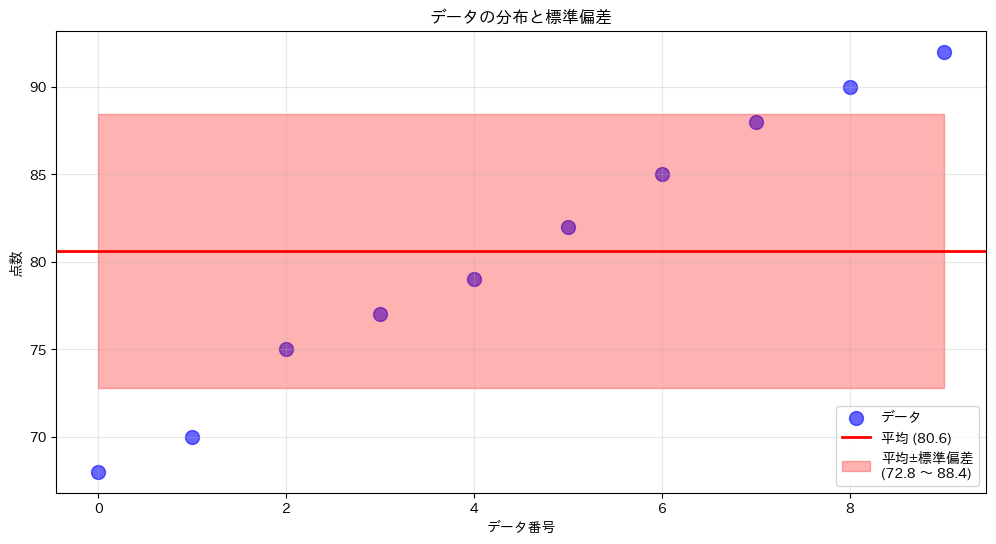

In [28]:
# 標準偏差を視覚化
plt.figure(figsize=(12, 6))

# データをソート
sorted_data = np.sort(data)
x = range(len(sorted_data))

# データポイントをプロット
plt.scatter(x, sorted_data, s=100, color='blue', alpha=0.6, label='データ')

# 平均線
plt.axhline(y=mean, color='red', linewidth=2, label=f'平均 ({mean:.1f})')

# 標準偏差の範囲
plt.fill_between(x, mean-std, mean+std, alpha=0.3, color='red', 
                 label=f'平均±標準偏差\n({mean-std:.1f} 〜 {mean+std:.1f})')

plt.xlabel('データ番号')
plt.ylabel('点数')
plt.title('データの分布と標準偏差')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 💡 標準偏差のポイント
- 分散の平方根
- 元のデータと同じ単位（点、円、cmなど）で表現できる
- 約68%のデータが「平均±標準偏差」の範囲に入る（正規分布の場合）

## 4. 実践例：商品の売上分析

実際のビジネスシーンを想定した例で統計を使ってみましょう。

In [29]:
# 30日間の商品売上データ（千円）
np.random.seed(42)
sales = np.random.normal(100, 20, 30).round(1)  # 平均100千円、標準偏差20千円
days = np.arange(1, 31)

# 基本統計量を計算
mean_sales = np.mean(sales)
std_sales = np.std(sales)
var_sales = np.var(sales)

print(f"平均売上: {mean_sales:.1f}千円")
print(f"標準偏差: {std_sales:.1f}千円")
print(f"分散: {var_sales:.1f}")

平均売上: 96.2千円
標準偏差: 17.7千円
分散: 313.4


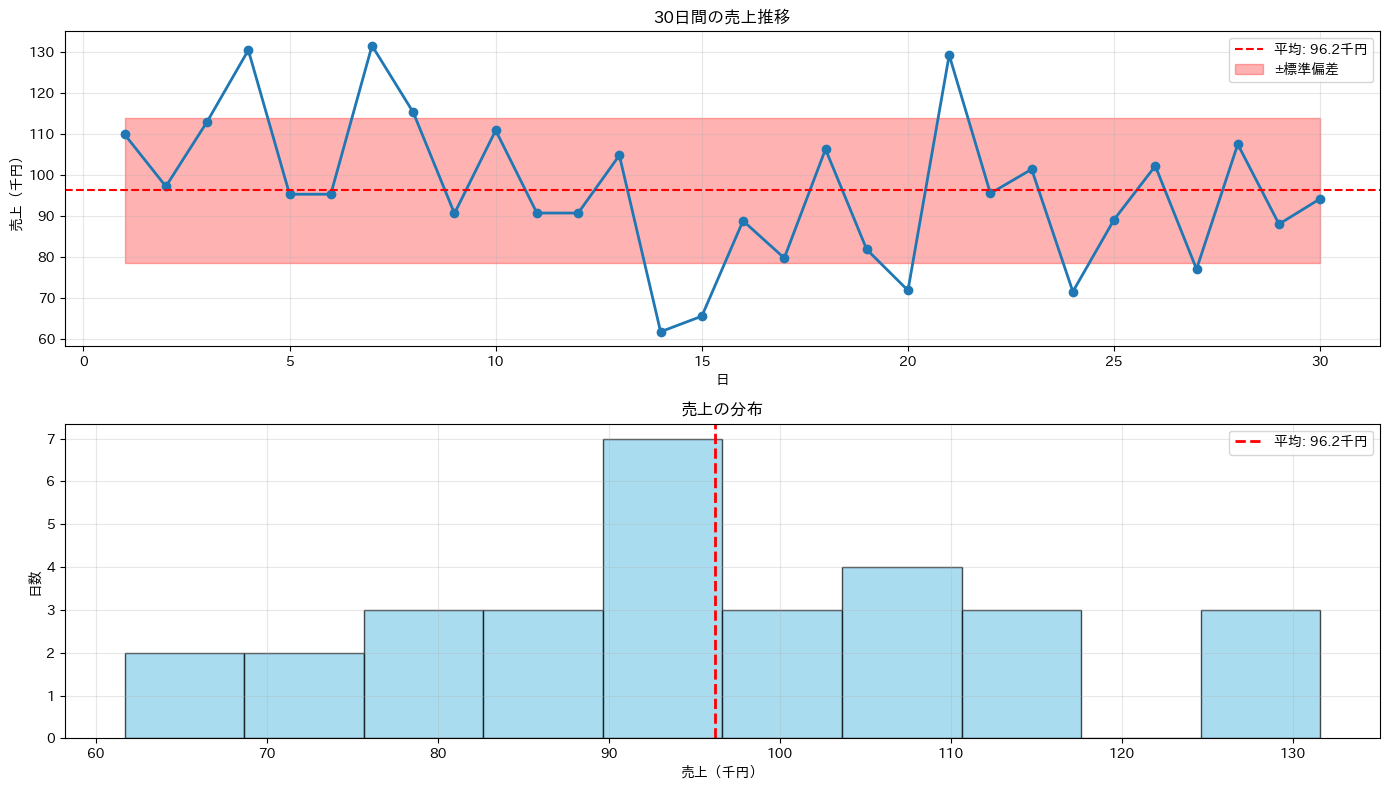

In [30]:
# 売上の推移をグラフ化
plt.figure(figsize=(14, 8))

# 日別売上
plt.subplot(2, 1, 1)
plt.plot(days, sales, marker='o', linewidth=2, markersize=6)
plt.axhline(y=mean_sales, color='red', linestyle='--', label=f'平均: {mean_sales:.1f}千円')
plt.fill_between(days, mean_sales-std_sales, mean_sales+std_sales, 
                 alpha=0.3, color='red', label=f'±標準偏差')
plt.xlabel('日')
plt.ylabel('売上（千円）')
plt.title('30日間の売上推移')
plt.legend()
plt.grid(True, alpha=0.3)

# 売上の分布
plt.subplot(2, 1, 2)
plt.hist(sales, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'平均: {mean_sales:.1f}千円')
plt.xlabel('売上（千円）')
plt.ylabel('日数')
plt.title('売上の分布')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
# ビジネス上の判断に使う
print("📊 売上分析レポート")
print("="*40)
print(f"平均売上: {mean_sales:.1f}千円/日")
print(f"標準偏差: {std_sales:.1f}千円")
print(f"\n予想される売上範囲:")
print(f"  通常時（68%の確率）: {mean_sales-std_sales:.1f} 〜 {mean_sales+std_sales:.1f}千円")
print(f"  ほぼ確実（95%の確率）: {mean_sales-2*std_sales:.1f} 〜 {mean_sales+2*std_sales:.1f}千円")

# 在庫管理への活用
print(f"\n💡 在庫管理への提案:")
print(f"  安全在庫: {mean_sales + 2*std_sales:.0f}千円分")
print(f"  通常在庫: {mean_sales + std_sales:.0f}千円分")

📊 売上分析レポート
平均売上: 96.2千円/日
標準偏差: 17.7千円

予想される売上範囲:
  通常時（68%の確率）: 78.5 〜 113.9千円
  ほぼ確実（95%の確率）: 60.8 〜 131.6千円

💡 在庫管理への提案:
  安全在庫: 132千円分
  通常在庫: 114千円分


## 練習問題

### 問題1: 身長データの分析
あるクラスの生徒20人の身長データがあります。

平均身長 170.0cm
標準偏差 3.8

標準偏差に含まれる身長範囲
166.2 〜 173.8 cm
この範囲に含まれるデータ: 12個 (60%)


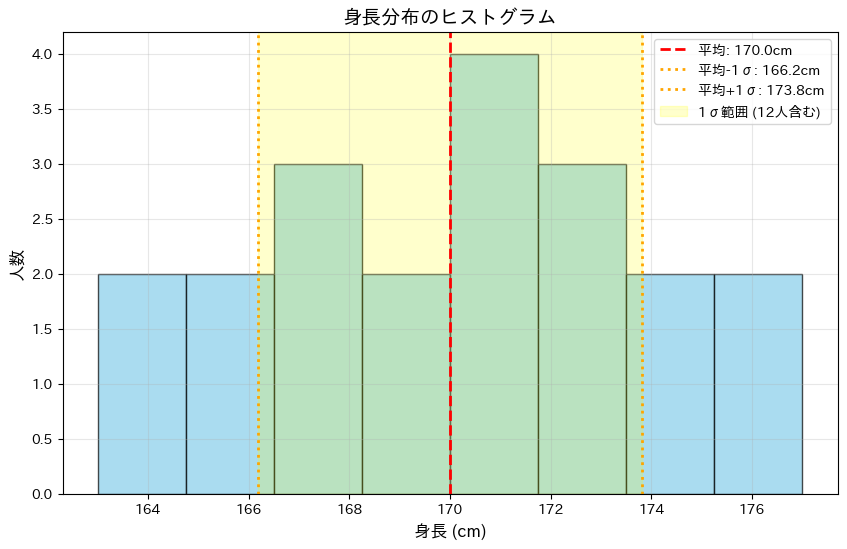

In [44]:
# 身長データ（cm）
heights = np.array([165, 172, 168, 175, 163, 170, 169, 177, 166, 174,
                    168, 171, 173, 167, 170, 172, 169, 176, 164, 171])

# ここに解答を書いてください
# 1. 平均身長を計算
heights_ave = heights.mean()
print(f"平均身長 {heights_ave:.1f}cm")
# 2. 標準偏差を計算
heights_std = heights.std()
print(f"標準偏差 {heights_std:.1f}")

# 3. 平均±標準偏差の範囲に何人の生徒が含まれるか確認
print(f"\n標準偏差に含まれる身長範囲\n{heights_ave - heights_std:.1f} 〜 {heights_ave + heights_std:.1f} cm")

# この範囲に含まれるデータ数を確認
within_1std = np.sum((heights >= heights_ave - heights_std) & (heights <= heights_ave + heights_std))
print(f"この範囲に含まれるデータ: {within_1std}個 ({within_1std/len(heights)*100:.0f}%)")

# 4. 結果を可視化（ヒストグラムと統計量）

import matplotlib.pyplot as plt

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=8, alpha=0.7, color='skyblue', edgecolor='black')

# 平均線を追加
plt.axvline(heights_ave, color='red', linestyle='--', linewidth=2, label=f'平均: {heights_ave:.1f}cm')

# 平均±標準偏差の範囲を追加
plt.axvline(heights_ave - heights_std, color='orange', linestyle=':', linewidth=2, 
            label=f'平均-1σ: {heights_ave - heights_std:.1f}cm')
plt.axvline(heights_ave + heights_std, color='orange', linestyle=':', linewidth=2, 
            label=f'平均+1σ: {heights_ave + heights_std:.1f}cm')

# 範囲をハイライト
plt.axvspan(heights_ave - heights_std, heights_ave + heights_std, 
            alpha=0.2, color='yellow', label=f'1σ範囲 ({within_1std}人含む)')

# グラフの装飾
plt.xlabel('身長 (cm)', fontsize=12)
plt.ylabel('人数', fontsize=12)
plt.title('身長分布のヒストグラム', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)


### 問題2: 2つの店舗の売上比較
A店とB店の1週間の売上データを比較してください。

=== 店舗売上分析 ===

店舗A: 46.4万円
店舗B: 46.0万円

【標準偏差（ばらつき）】
店舗A: 1.6万円
店舗B: 8.9万円

【安定性の判断】
より安定している: 店舗A
より不安定: 店舗B

【変動係数（相対的なばらつき）】
店舗A: 3.4%
店舗B: 19.3%
※ 変動係数が小さいほど相対的に安定


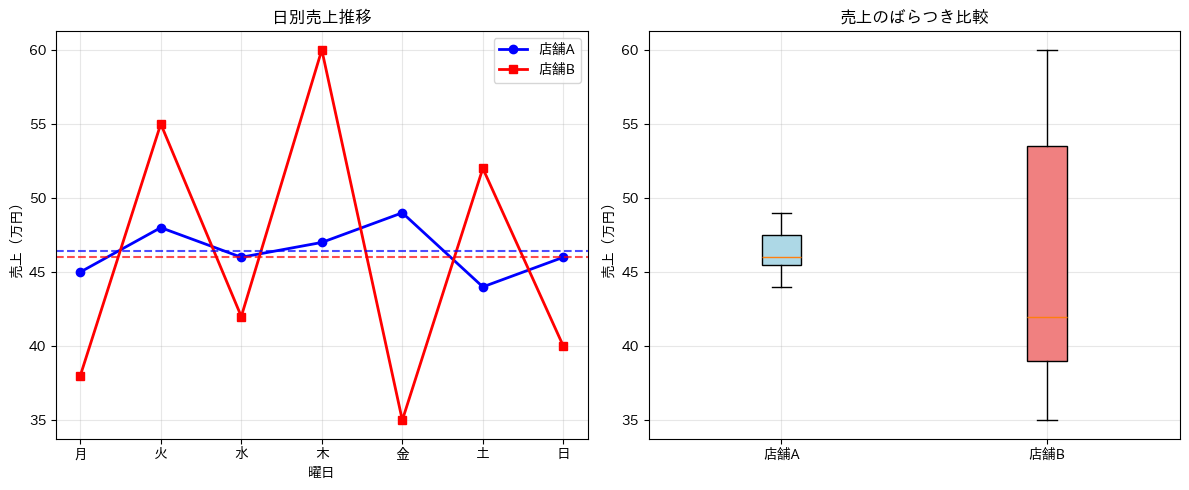

=== 店舗比較サマリー ===
店舗A - 平均: 46.4万円, 標準偏差: 1.6万円
店舗B - 平均: 46.0万円, 標準偏差: 8.9万円
結論: 店舗Aの方が売上が安定している


In [52]:
# 1週間の売上データ（万円）
shop_A = np.array([45, 48, 46, 47, 49, 44, 46])
shop_B = np.array([38, 55, 42, 60, 35, 52, 40])

# ここに解答を書いてください
# 1. 各店舗の平均売上を計算
avg_A = shop_A.mean()
avg_B = shop_B.mean()

print("=== 店舗売上分析 ===\n")
print(f"店舗A: {avg_A:.1f}万円")
print(f"店舗B: {avg_B:.1f}万円")

# 2. 各店舗の標準偏差を計算
std_A = shop_A.std()
std_B = shop_B.std()

print(f"\n【標準偏差（ばらつき）】")
print(f"店舗A: {std_A:.1f}万円")
print(f"店舗B: {std_B:.1f}万円")

# 3. どちらの店舗の売上が安定しているか判断
print(f"\n【安定性の判断】")

if std_A < std_B:
    more_stable = "店舗A"
    less_stable = "店舗B"
else:
    more_stable = "店舗B"
    less_stable = "店舗A"

print(f"より安定している: {more_stable}")
print(f"より不安定: {less_stable}")

# 変動係数（CV）も計算してみる
cv_A = (std_A / avg_A) * 100
cv_B = (std_B / avg_B) * 100

print(f"\n【変動係数（相対的なばらつき）】")
print(f"店舗A: {cv_A:.1f}%")
print(f"店舗B: {cv_B:.1f}%")
print("※ 変動係数が小さいほど相対的に安定")

# 4. 両店舗を比較するグラフを作成

# 4. 両店舗を比較するグラフを作成
# 4. 両店舗を比較するグラフを作成
import matplotlib.pyplot as plt

# 曜日ラベル
days = ['月', '火', '水', '木', '金', '土', '日']

# 1つの図に2つのグラフを作成
plt.figure(figsize=(12, 5))

# 1. 日別売上推移の比較
plt.subplot(1, 2, 1)
plt.plot(days, shop_A, 'o-', color='blue', linewidth=2, markersize=6, label='店舗A')
plt.plot(days, shop_B, 's-', color='red', linewidth=2, markersize=6, label='店舗B')

# 平均線を追加
plt.axhline(shop_A.mean(), color='blue', linestyle='--', alpha=0.7)
plt.axhline(shop_B.mean(), color='red', linestyle='--', alpha=0.7)

plt.title('日別売上推移')
plt.ylabel('売上（万円）')
plt.xlabel('曜日')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. 箱ひげ図で分布比較
plt.subplot(1, 2, 2)
box_data = [shop_A, shop_B]
box_plot = plt.boxplot(box_data, tick_labels=['店舗A', '店舗B'], patch_artist=True)

# 箱の色を設定
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][1].set_facecolor('lightcoral')

plt.title('売上のばらつき比較')
plt.ylabel('売上（万円）')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 簡単な統計サマリーを出力
print("=== 店舗比較サマリー ===")
print(f"店舗A - 平均: {shop_A.mean():.1f}万円, 標準偏差: {shop_A.std():.1f}万円")
print(f"店舗B - 平均: {shop_B.mean():.1f}万円, 標準偏差: {shop_B.std():.1f}万円")
print(f"結論: 店舗{'A' if shop_A.std() < shop_B.std() else 'B'}の方が売上が安定している")


## まとめ

今日学んだこと：

1. **平均（Mean）**
   - データの中心的な値
   - 全データの合計 ÷ データ数

2. **分散（Variance）**
   - データのばらつきを表す
   - 各データと平均の差の2乗の平均

3. **標準偏差（Standard Deviation）**
   - 分散の平方根
   - 元のデータと同じ単位で表現できる
   - データのばらつきの目安

これらの統計量を使うことで、データの特徴を数値で表現し、
適切な判断や予測ができるようになります！